### **Development of Binary Classification Model to predict Room Occupancy**

In the modern world, the energy efficiency has become a significant issue worldwide. Seeking solutions to achieve energy efficiency with analyzing all the factors manually, is a bit challanging as it will cost a massive amount of time and resources to find potential solutions to overcome these issues.

This project focuses on improving the energy efficiency of the heating and cooling systems within residential complexes. These residential complexes contains a large quantity of rooms and the most of the current heating and cooling systems are in-efficient. Therefore, the energy waste within these systems is high, as they don't work on factors such as occupancy.

Making the heating and cooling systems more smarter with the application of IoT (Internet of Things) will make them more efficient and therefore it will reduce the unnecessary energy usage. Making the systems smarter will enable them to turn on and off based on analyzing the occupancy of the premises by themselves.

In order to achieve the above capabilities we need the power of AI and IoT. The AI will be used to analyze the data of the premises and find patterns between these collected data and the occupancy of the premises. Finding these patterns through AI techniques such as machine learning will enable us to generate models which we can use to predict the occupancy of the premises. Using these model with IoT enabled components, we can turn the traditional systems to into smart agents, where the systems will be smarter enough to turn on, only when needed.

To make the current systems smarter, we need to collect some data which is co-related with the presense of the person. These data will be collected over time and will be used to train a AI model. Finally an accurate model will be able to predict the occupancy of the room based on a set of input parameters. For this purpose to train the model, we use the below dataset which is collected and contributed by **Luis M. Candanedo, VÃ©ronique Feldheim**. 

Dataset Url: https://archive.ics.uci.edu/ml/datasets/Occupancy+Detection+

The dataset contains labeled data of the below 7 features,
*   Date
*   Temperature
*   Humidity
*   Light
*   CO2
*   Humidity Ratio
*   Occupancy

In this project we use **Binary Classification** since in this machine learning task, we use the features to predict the **target class (Occupancy)** belongs to one of the possible categories (occupied = 1, un-occupied = 0).



## **Phase 1: Importing the set of required dependancies**

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import os
from google.colab import drive

### Phase 1.1 Importing the data

In [2]:
#Mount the root of storage
drive.mount('content/')
dataFrame = pd.read_csv('content/MyDrive/Dataset/Occupancy.csv')

Drive already mounted at content/; to attempt to forcibly remount, call drive.mount("content/", force_remount=True).


### Phase 1.2 visualizing the data to check if loaded correctly from source

In [3]:
print(dataFrame.shape)

(20560, 7)


In [4]:
print(dataFrame.head(100))

                   date  Temperature   Humidity       Light          CO2  \
0   2015-02-02 14:19:00      23.7000  26.272000  585.200000   749.200000   
1   2015-02-02 14:19:59      23.7180  26.290000  578.400000   760.400000   
2   2015-02-02 14:21:00      23.7300  26.230000  572.666667   769.666667   
3   2015-02-02 14:22:00      23.7225  26.125000  493.750000   774.750000   
4   2015-02-02 14:23:00      23.7540  26.200000  488.600000   779.000000   
..                  ...          ...        ...         ...          ...   
95  2015-02-02 15:53:59      23.1000  28.918000  444.000000  1166.600000   
96  2015-02-02 15:55:00      23.1000  27.925000  444.000000  1140.250000   
97  2015-02-02 15:55:59      23.0600  27.772000  444.000000  1089.200000   
98  2015-02-02 15:56:59      23.0200  27.556000  435.000000  1042.600000   
99  2015-02-02 15:58:00      23.0100  27.818833  432.000000  1051.100000   

    HumidityRatio  Occupancy  
0        0.004764          1  
1        0.004773        

In [5]:
print(dataFrame.sample())

                      date  Temperature  Humidity  Light    CO2  \
15290  2015-02-14 17:30:00         20.0     35.59   14.0  522.0   

       HumidityRatio  Occupancy  
15290       0.005152          0  


In [6]:
dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20560 entries, 0 to 20559
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           20560 non-null  object 
 1   Temperature    20560 non-null  float64
 2   Humidity       20560 non-null  float64
 3   Light          20560 non-null  float64
 4   CO2            20560 non-null  float64
 5   HumidityRatio  20560 non-null  float64
 6   Occupancy      20560 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 1.1+ MB


In [7]:
# Convert the 'date' column to datetime format
dataFrame['date'] = pd.to_datetime(dataFrame['date'])

### Phase 1.3 Checking the quality of the dataset to check whether the dataset is balanced

In [8]:
occupied = dataFrame[dataFrame['Occupancy'] == 1].shape[0]
not_occupied = dataFrame[dataFrame['Occupancy'] == 0].shape[0]

print('Proportion of occupied rooms:', occupied/dataFrame.shape[0])
print('Proportion of not occupied rooms:', not_occupied/dataFrame.shape[0])

Proportion of occupied rooms: 0.23103112840466927
Proportion of not occupied rooms: 0.7689688715953308


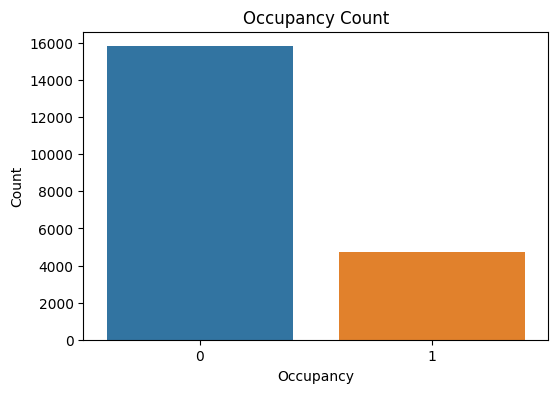

In [9]:
plt.figure(figsize=(6,4))
sns.countplot(x='Occupancy', data=dataFrame)
plt.title('Occupancy Count')
plt.xlabel('Occupancy')
plt.ylabel('Count')
plt.show()

After running the above code to check whether the dataset is balanced, it shows as the dataset is quite imbalanced since the output results and the plot figure shows as,
*   The occupied portion of rooms = 23%
*   The non-occupied portion of rooms = 76%

As the above dataset is imbalanced we need to perform some operations since we need to ensure the quality of the dataset. For this we have some options to optimize out imbalanced dataset and make it balanced. The oversampling or undersampling techniques can be performed on the dataset to make this balanced.

On this stage we will move forward with out dataset without performing the resampling techniques manually as our dependency **Pycaret** will enable fixing the imbalanced datasets.



## **Phase 2: Data Exploration**

### Phase 2.1 Analyzing the features of the dataset

In [10]:
dataFrame.describe()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
count,20560.000000,20560.000000,20560.000000,20560.000000,20560.000000,20560.000000
mean,20.906212,27.655925,130.756622,690.553276,0.004228,0.231031
std,1.055315,4.982154,210.430875,311.201281,0.000768,0.421503
min,19.000000,16.745000,0.000000,412.750000,0.002674,0.000000
25%,20.200000,24.500000,0.000000,460.000000,0.003719,0.000000
50%,20.700000,27.290000,0.000000,565.416667,0.004292,0.000000
75%,21.525000,31.290000,301.000000,804.666667,0.004832,0.000000
max,24.408333,39.500000,1697.250000,2076.500000,0.006476,1.000000


The above output will display the features and the target class - Occupancy.

The figure shows that the,
*   Temperature range is between 19c to 24.4c.
*   Humidicty range is between 16.7% to 39.5%.
*   Light range is between 0 (lux) to 1697.2 (lux).
*   CO2 range is between 412.75 (ppm) to 2076.5(ppm).
*   Humidity ratio is between 26.74% to 64.76%



### Phase 2.2 Visualizing the data

<ipython-input-11-e2bf4572770f>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = dataFrame.corr()


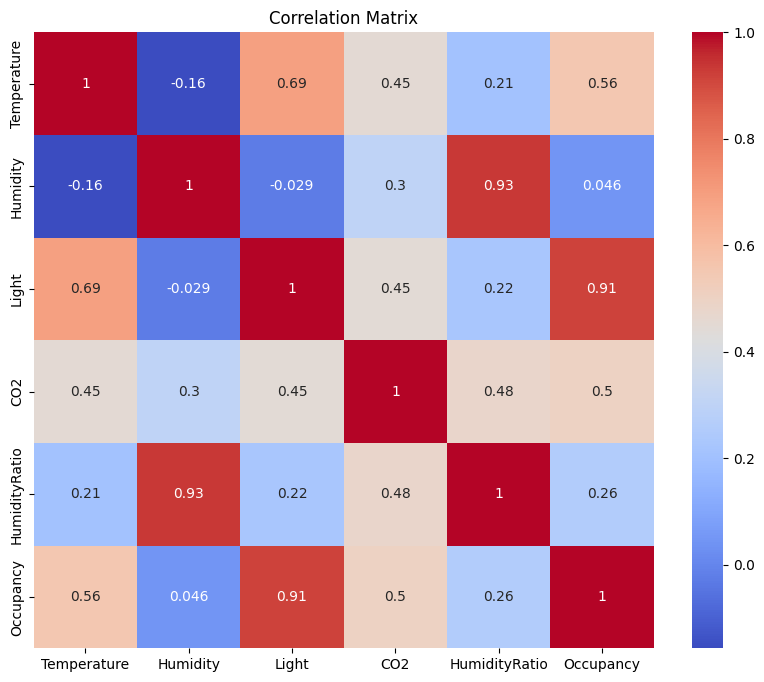

In [11]:
corr_matrix = dataFrame.corr()

fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', ax=ax)
plt.title('Correlation Matrix')
plt.show()

## Phase 3: Feature Engineering

### Phase 3.1 On this stage we extract more features

We extract more features from the existing 'date' feature and derieve the following features,

*   Day of the week (0 = Monday, 6 = Sunday)
*   Time of the day (Morning = 0, Evening = 1, Night = 2)



In [12]:
# Derive day of week
dataFrame['day_of_week'] = dataFrame['date'].dt.dayofweek

# Derive time of day
dataFrame['time_of_day'] = pd.cut(dataFrame['date'].dt.hour, bins=[-1, 12, 20, 24], labels=[0, 1, 2])

# Convert time of day to integer
dataFrame['time_of_day'] = dataFrame['time_of_day'].astype(int)

In [13]:
dataFrame.describe()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy,day_of_week,time_of_day
count,20560.000000,20560.000000,20560.000000,20560.000000,20560.000000,20560.000000,20560.000000,20560.000000
mean,20.906212,27.655925,130.756622,690.553276,0.004228,0.231031,2.896109,0.589591
std,1.055315,4.982154,210.430875,311.201281,0.000768,0.421503,2.059338,0.710383
min,19.000000,16.745000,0.000000,412.750000,0.002674,0.000000,0.000000,0.000000
25%,20.200000,24.500000,0.000000,460.000000,0.003719,0.000000,1.000000,0.000000
50%,20.700000,27.290000,0.000000,565.416667,0.004292,0.000000,3.000000,0.000000
75%,21.525000,31.290000,301.000000,804.666667,0.004832,0.000000,5.000000,1.000000
max,24.408333,39.500000,1697.250000,2076.500000,0.006476,1.000000,6.000000,2.000000


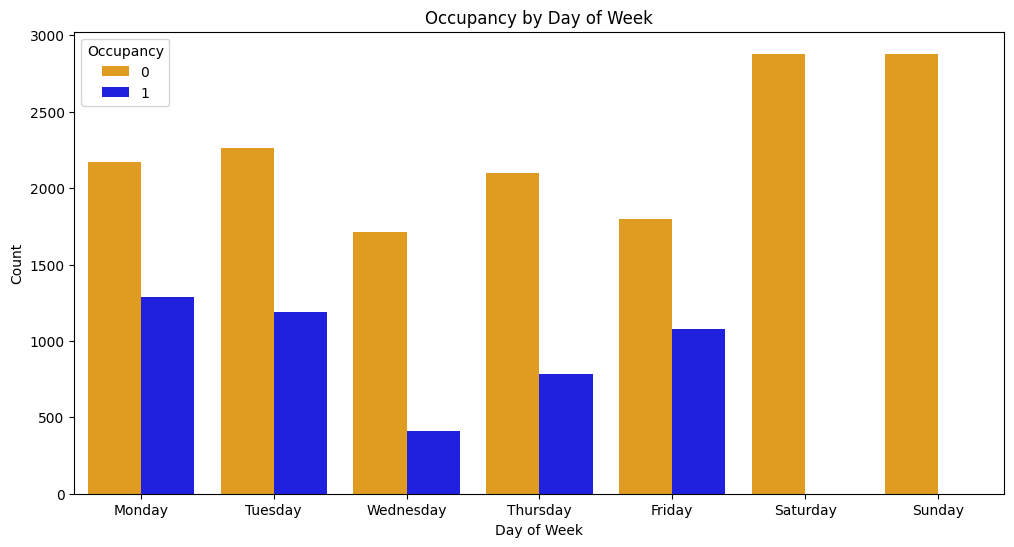

In [14]:
# Create a new dataframe with day_of_week and occupancy columns
occupancy_by_day = dataFrame.groupby(['day_of_week', 'Occupancy']).size().reset_index(name='count')

# Plot the graph
plt.figure(figsize=(12,6))
sns.barplot(x='day_of_week', y='count', hue='Occupancy', data=occupancy_by_day, palette=['orange', 'blue'])
plt.title('Occupancy by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Count')
plt.xticks(range(7), ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.show()

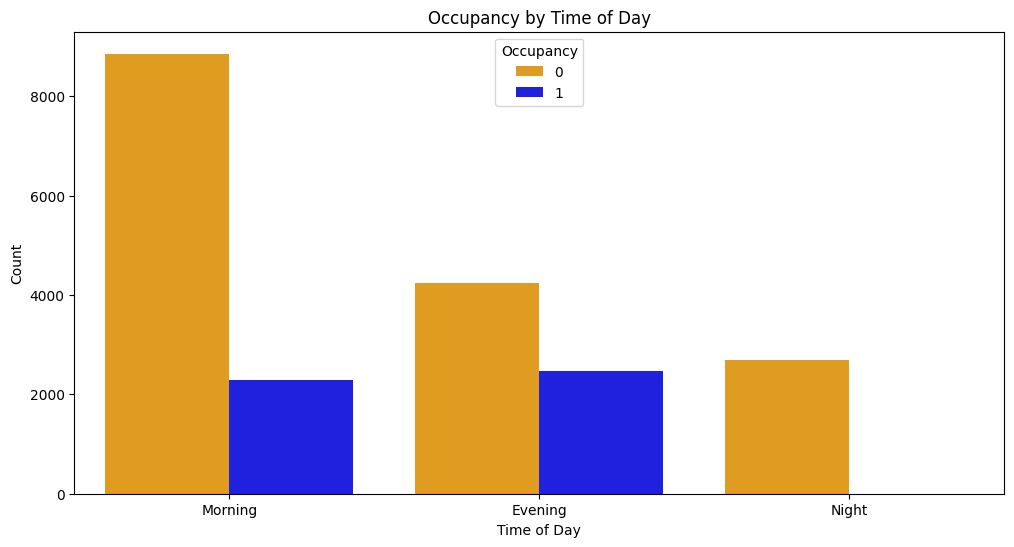

In [15]:
# Create a new dataframe with time_of_day and occupancy columns
occupancy_by_time = dataFrame.groupby(['time_of_day', 'Occupancy']).size().reset_index(name='count')

# Plot the graph
plt.figure(figsize=(12,6))
sns.barplot(x='time_of_day', y='count', hue='Occupancy', data=occupancy_by_time, palette=['orange', 'blue', 'green'])
plt.title('Occupancy by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Count')
plt.xticks(range(3), ['Morning', 'Evening', 'Night'])
plt.show()

## **Phase 4: Data pre-processing**

### Phase 4.1: On this stage we will remove the 'date' feature of the dataset.

In [16]:
if 'date' in dataFrame.columns:
    dataFrame.drop('date', axis=1, inplace=True)
else:
    print("date feature is already removed")

In [17]:
dataFrame.describe()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy,day_of_week,time_of_day
count,20560.000000,20560.000000,20560.000000,20560.000000,20560.000000,20560.000000,20560.000000,20560.000000
mean,20.906212,27.655925,130.756622,690.553276,0.004228,0.231031,2.896109,0.589591
std,1.055315,4.982154,210.430875,311.201281,0.000768,0.421503,2.059338,0.710383
min,19.000000,16.745000,0.000000,412.750000,0.002674,0.000000,0.000000,0.000000
25%,20.200000,24.500000,0.000000,460.000000,0.003719,0.000000,1.000000,0.000000
50%,20.700000,27.290000,0.000000,565.416667,0.004292,0.000000,3.000000,0.000000
75%,21.525000,31.290000,301.000000,804.666667,0.004832,0.000000,5.000000,1.000000
max,24.408333,39.500000,1697.250000,2076.500000,0.006476,1.000000,6.000000,2.000000


## **Phase 5: Determine Co-Relation between features including new**

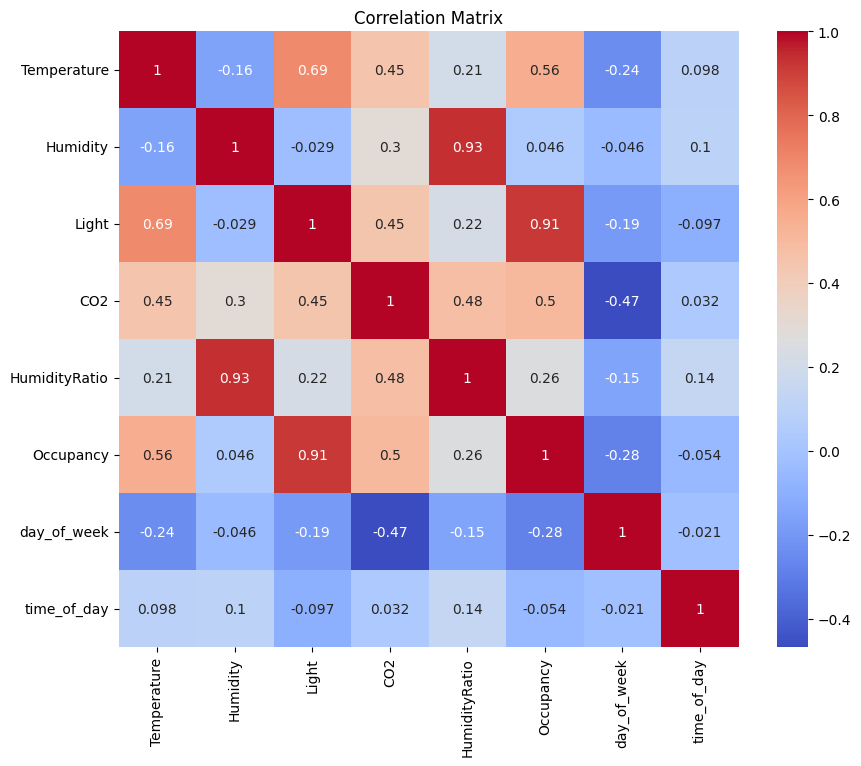

In [18]:
corr_matrix = dataFrame.corr()

fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', ax=ax)
plt.title('Correlation Matrix')
plt.show()

Based on the above co-relation matrix we can identify that out target (Occupancy) has a strong relationship between the below features,

*   Light (Very Strong 91%)
*   Temperature (Strong 56%)
*   CO2 (Strong >50%)

Above data shows that these features are an excellent predictor factors for out target class.

Also, in the above heatmap we can identify that there is a strong relationship between the Humidity and the humidity ratio features. As the HumidityRation is derieved from the Humidity data they both have this strong co-relation. But for the model training process, we will drop the HumidityRatio feature as we believe it will impact the accuracy and the performance of the developed model.



In [19]:
if 'HumidityRatio' in dataFrame.columns:
    dataFrame = dataFrame.drop('HumidityRatio', axis=1)
else:
    print("HumidityRatio feature is already removed")

dataFrame.describe()

,Temperature,Humidity,Light,CO2,Occupancy,day_of_week,time_of_day
count,20560.000000,20560.000000,20560.000000,20560.000000,20560.000000,20560.000000,20560.000000
mean,20.906212,27.655925,130.756622,690.553276,0.231031,2.896109,0.589591
std,1.055315,4.982154,210.430875,311.201281,0.421503,2.059338,0.710383
min,19.000000,16.745000,0.000000,412.750000,0.000000,0.000000,0.000000
25%,20.200000,24.500000,0.000000,460.000000,0.000000,1.000000,0.000000
50%,20.700000,27.290000,0.000000,565.416667,0.000000,3.000000,0.000000
75%,21.525000,31.290000,301.000000,804.666667,0.000000,5.000000,1.000000
max,24.408333,39.500000,1697.250000,2076.500000,1.000000,6.000000,2.000000


In [20]:
#Installing Pycaret

!pip install pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## **Phase 5: Training and Evaluating the Models**




### Phase 5.1 Split testing and training data

In [21]:
# Testing data will be 10% of the total dataset (1.0 - 0.1 = 10%)
validationDataFrame = dataFrame.sample(frac=0.1, random_state=42)

# Remaining 90% of the dataset
dataFrame = dataFrame.drop(validationDataFrame.index)

print("Validation data frame", validationDataFrame.shape)
print("Train-Test data frame", dataFrame.shape)

Validation data frame (2056, 7)
Train-Test data frame (18504, 7)


### Phase 5.2 Feature selection stage

On this stage we select the most important features to train the model. We can use the above co-relation matrix to decide which features to select. Based on it the features,

*   Light
*   Temperature
*   CO2

are a good selection of features to train the model on.

For the training process, we train two models with providing different feature sets and measure their performance in the evaluation phase.

In [22]:
modelFirst = dataFrame[['Temperature','Light','CO2','Occupancy']]
modelSecond = dataFrame[['Temperature','Humidity','Light','CO2','Occupancy','day_of_week','time_of_day']]

In [23]:
modelFirst.describe()

,Temperature,Light,CO2,Occupancy
count,18504.000000,18504.000000,18504.000000,18504.000000
mean,20.906182,130.080380,690.137394,0.229788
std,1.056115,210.019514,310.963027,0.420708
min,19.000000,0.000000,412.750000,0.000000
25%,20.200000,0.000000,460.000000,0.000000
50%,20.700000,0.000000,565.500000,0.000000
75%,21.500000,293.666667,804.000000,0.000000
max,24.408333,1546.333333,2076.500000,1.000000


In [24]:
modelSecond.describe()

,Temperature,Humidity,Light,CO2,Occupancy,day_of_week,time_of_day
count,18504.000000,18504.000000,18504.000000,18504.000000,18504.000000,18504.000000,18504.000000
mean,20.906182,27.645360,130.080380,690.137394,0.229788,2.898617,0.591980
std,1.056115,4.968251,210.019514,310.963027,0.420708,2.060111,0.711372
min,19.000000,16.745000,0.000000,412.750000,0.000000,0.000000,0.000000
25%,20.200000,24.500000,0.000000,460.000000,0.000000,1.000000,0.000000
50%,20.700000,27.282000,0.000000,565.500000,0.000000,3.000000,0.000000
75%,21.500000,31.245000,293.666667,804.000000,0.000000,5.000000,1.000000
max,24.408333,39.500000,1546.333333,2076.500000,1.000000,6.000000,2.000000


### Phase 5.3 Selection of the ML model





For the machine learning and model training phase, we use PyCaret ML library which is developed on a set of dependencies.

PyCaret is essentially a Python wrapper around several machine learning libraries and frameworks such as scikit-learn, XGBoost, LightGBM, CatBoost, Optuna, Hyperopt, Ray, and few more (GitHub)[https://github.com/pycaret/pycaret].

## Fixing imbalance datasets

The PyCaret dependency has the below parameters to fix the imbalance datasets. As our current datasets are in a imbalanced state, we use the power of PyCaret depencency to make the datasets balanced before training the model.

*   fix_imbalance = True (Makes our dataset balance)
*   fix_imbalance_method = We use undersampling the majority



### Phase 5.4 Model 1

#### **Phase 5.4.1 Training the Model 1**

Features:
*   Temperature
*   Light
*   Co2
*   Occupancy (Target)



In [25]:
from pycaret.classification import *
experimentFirst = setup(modelFirst, target='Occupancy', fix_imbalance=True, fix_imbalance_method='randomundersampler', data_split_shuffle = True, train_size = 0.8)

#Using the PyCaret dependency we can execute the compare_models() method to evaluate all the ML models and get the best model based on different factors

,Description,Value
0,Session id,7666
1,Target,Occupancy
2,Target type,Binary
3,Original data shape,"(18504, 4)"
4,Transformed data shape,"(10505, 4)"
5,Transformed train set shape,"(6804, 4)"
6,Transformed test set shape,"(3701, 4)"
7,Numeric features,3
8,Preprocess,True
9,Imputation type,simple


In [27]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.9906,0.9982,0.9935,0.9666,0.9799,0.9737,0.9739,0.5670
xgboost,Extreme Gradient Boosting,0.9901,0.9978,0.9947,0.9636,0.9789,0.9725,0.9727,0.6910
lightgbm,Light Gradient Boosting Machine,0.9900,0.9979,0.9941,0.9636,0.9786,0.9721,0.9723,0.2960
knn,K Neighbors Classifier,0.9893,0.9948,0.9956,0.9596,0.9772,0.9703,0.9706,0.2320
rf,Random Forest Classifier,0.9893,0.9978,0.9938,0.9608,0.9770,0.9700,0.9703,0.7690
ada,Ada Boost Classifier,0.9890,0.9972,0.9956,0.9582,0.9765,0.9693,0.9696,0.4260
lr,Logistic Regression,0.9882,0.9946,0.9965,0.9542,0.9749,0.9671,0.9675,0.1450
gbc,Gradient Boosting Classifier,0.9878,0.9971,0.9929,0.9559,0.9741,0.9661,0.9664,0.9870
dt,Decision Tree Classifier,0.9873,0.9867,0.9856,0.9603,0.9727,0.9645,0.9646,0.1500
lda,Linear Discriminant Analysis,0.9827,0.9940,0.9971,0.9325,0.9637,0.9523,0.9533,0.0940


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

From the above result, we can decide that the Extra Trees Classifier is the most suitable model for the training operation. We can select the et (extra trees) for the training process as it has the most,

*   Accuracy (99.06%)
*   Recall value (0.9881)
*   Precision (0.95658)
*   F1 Score (0.9799)

As the above scores are satisfying, we can continue with the Extra Trees Classifier ML model to train our First Model.



In [28]:
classifierOne = create_model('et')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9892,0.9981,0.9971,0.9576,0.9769,0.9699,0.9702
1,0.9899,0.9975,0.9824,0.9738,0.9781,0.9715,0.9715
2,0.9926,0.9993,0.9941,0.9741,0.9840,0.9792,0.9793
3,0.9905,0.9983,0.9941,0.9657,0.9797,0.9735,0.9737
4,0.9939,0.9973,0.9971,0.9769,0.9869,0.9829,0.9830
5,0.9919,0.9986,1.0000,0.9659,0.9827,0.9774,0.9776
6,0.9932,0.9992,0.9971,0.9741,0.9855,0.9811,0.9812
7,0.9892,0.9974,0.9912,0.9629,0.9768,0.9698,0.9699
8,0.9872,0.9955,0.9941,0.9521,0.9727,0.9643,0.9647


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [29]:
#Finalizing the Experiment One
finalModelOne = finalize_model(classifierOne)

#### **Phase 5.4.2 Evaluating the Model 1**

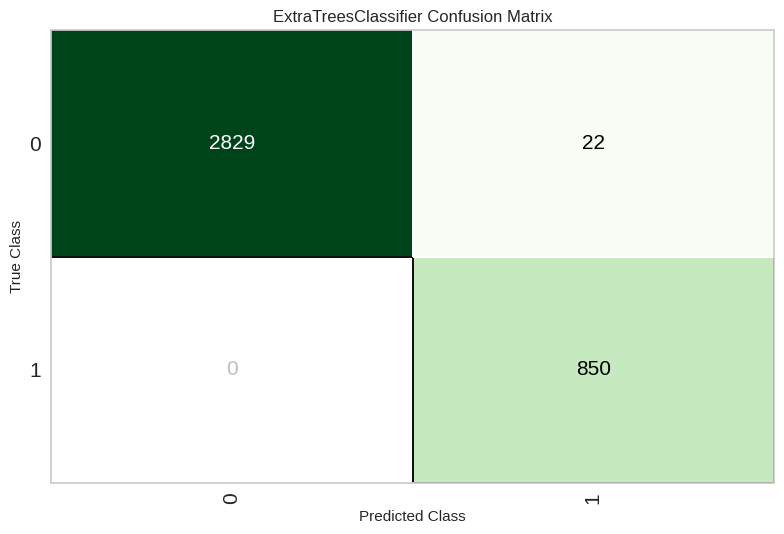

In [30]:
#Confusion Matrix
plot_model(finalModelOne, plot = 'confusion_matrix')

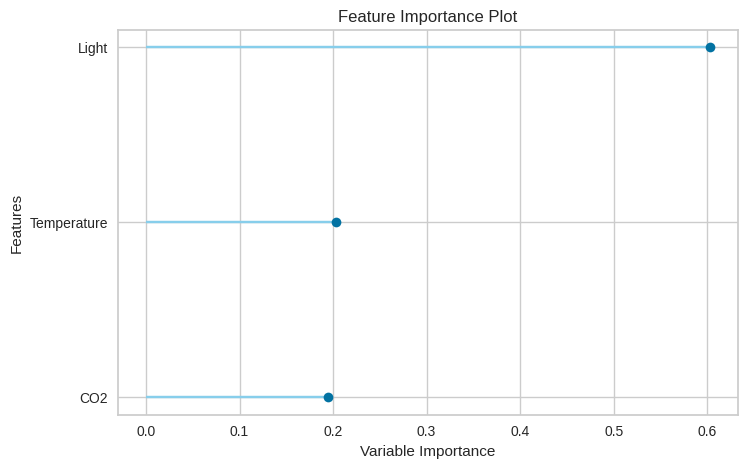

In [31]:
#Feature Importance
plot_model(finalModelOne, plot = 'feature')

### Phase 5.5 Model 2


#### **Phase 5.4.1 Training the Model 2**

Features:
*   Temperature
*   Humidity
*   Light
*   Co2
*   Time of Day
*   Day of Week
*   Occupancy (Target)



In [34]:
experimentSecond = setup(modelSecond, target='Occupancy', fix_imbalance=True, fix_imbalance_method='randomundersampler', data_split_shuffle = True, train_size = 0.8)

,Description,Value
0,Session id,178
1,Target,Occupancy
2,Target type,Binary
3,Original data shape,"(18504, 7)"
4,Transformed data shape,"(10505, 7)"
5,Transformed train set shape,"(6804, 7)"
6,Transformed test set shape,"(3701, 7)"
7,Numeric features,6
8,Preprocess,True
9,Imputation type,simple


In [36]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.9927,0.9982,0.9947,0.9742,0.9843,0.9796,0.9797,0.6490
lightgbm,Light Gradient Boosting Machine,0.9921,0.9984,0.9971,0.9695,0.9831,0.9779,0.9781,0.2580
rf,Random Forest Classifier,0.9915,0.9984,0.9956,0.9684,0.9818,0.9762,0.9764,1.1510
xgboost,Extreme Gradient Boosting,0.9912,0.9980,0.9956,0.9670,0.9811,0.9753,0.9755,0.8060
dt,Decision Tree Classifier,0.9896,0.9893,0.9888,0.9668,0.9776,0.9709,0.9710,0.1150
qda,Quadratic Discriminant Analysis,0.9892,0.9930,0.9982,0.9567,0.9770,0.9700,0.9704,0.1060
lr,Logistic Regression,0.9889,0.9937,0.9971,0.9567,0.9764,0.9692,0.9696,0.2130
ada,Ada Boost Classifier,0.9889,0.9971,0.9950,0.9585,0.9764,0.9691,0.9695,0.4470
gbc,Gradient Boosting Classifier,0.9889,0.9975,0.9950,0.9583,0.9762,0.9690,0.9693,1.2200
knn,K Neighbors Classifier,0.9884,0.9940,0.9947,0.9566,0.9752,0.9677,0.9680,0.1610


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

From the above result, we can decide that the Extra Trees Classifier is the most suitable model for the training operation. We can select the et (extra trees) for the training process as it has the most,

*   Accuracy (99.27%)
*   Recall value (0.9947)
*   Precision (0.9742)
*   F1 Score (0.9843)

As the above scores are satisfying, we can continue with the Extra Trees Classifier ML model to train our Second Model.

In [37]:
classifierTwo = create_model('et')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9905,0.9986,1.0000,0.9605,0.9798,0.9737,0.9740
1,0.9899,0.9983,0.9883,0.9684,0.9782,0.9716,0.9717
2,0.9926,0.9978,0.9912,0.9769,0.9840,0.9792,0.9792
3,0.9932,0.9994,1.0000,0.9714,0.9855,0.9811,0.9813
4,0.9946,0.9985,0.9941,0.9826,0.9883,0.9848,0.9848
5,0.9939,0.9994,0.9941,0.9797,0.9869,0.9829,0.9829
6,0.9946,0.9993,0.9941,0.9826,0.9883,0.9848,0.9848
7,0.9932,0.9994,0.9912,0.9797,0.9854,0.9810,0.9810
8,0.9939,0.9987,1.0000,0.9742,0.9869,0.9830,0.9831


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [38]:
#Finalizing the Experiment Two
finalModelTwo = finalize_model(classifierTwo)

#### **Phase 5.5.2 Evaluating the Model 2**

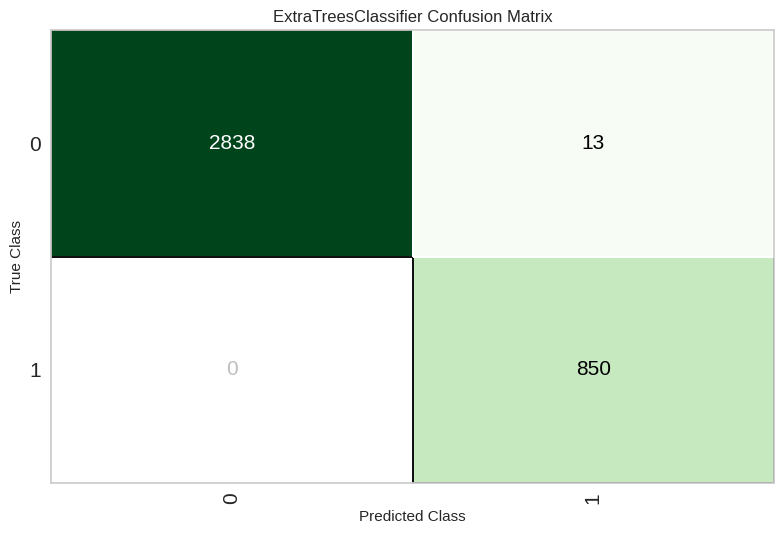

In [39]:
plot_model(finalModelTwo, plot = 'confusion_matrix')

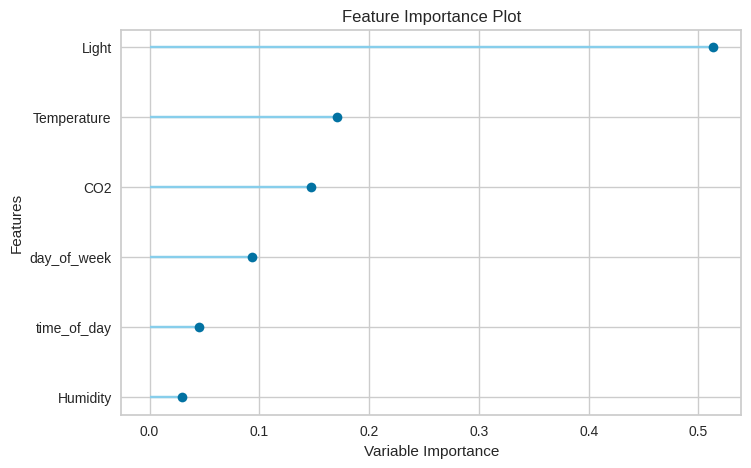

In [40]:
plot_model(finalModelTwo, plot = 'feature')

## Phase 6: Saving the Models for Deployment

In [ ]:
import joblib

joblib.dump(finalModelTwo, 'energyM2V1.1.joblib')

['energyM2V1.1.joblib']